## Neural Networks

**January 2025 - Instructor:  Connor Douglas**

#Predicting Survival Rate of Patients One Year After a Heart Attack using Machine Learning and Neural Networks

The aim of this project is to predict and classify whether a patient will survive if they have had a heart attack at least one year ago.

## Details of data set??


#Installing Google Drive to import the dataset

Here we are using `gdown` which can directly import a dataset from google drive given the id number.

In [45]:

pip install gdown

In [46]:
import gdown

# File ID from the Google Drive link
file_id = "19SHtybOdwylLLY-FKoG8592mTsiGjaCW"
# The direct download URL using gdown
url = f"https://drive.google.com/uc?id={file_id}"

# Output file name (you can choose any name with the correct extension)
output = "data.csv"

# Downloading the file
gdown.download(url, output, quiet=False)

# Now, you can load the data using pandas or any other method
import pandas as pd

# Load the data into a pandas DataFrame
df= pd.read_csv(output)


Downloading...
From: https://drive.google.com/uc?id=19SHtybOdwylLLY-FKoG8592mTsiGjaCW
To: /content/data.csv
100%|██████████| 6.84k/6.84k [00:00<00:00, 3.47MB/s]


#Importing the required libraries

In [47]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer

In [48]:
df.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   survival              130 non-null    float64
 1   alive                 131 non-null    float64
 2   age                   126 non-null    float64
 3   pericardialeffusion   132 non-null    float64
 4   fractionalshortening  124 non-null    float64
 5   epss                  117 non-null    float64
 6   lvdd                  121 non-null    float64
 7   wallmotion-score      128 non-null    float64
 8   wallmotion-index      130 non-null    float64
 9   mult                  129 non-null    float64
 10  name                  131 non-null    object 
 11  group                 110 non-null    object 
 12  aliveat1              75 non-null     float64
dtypes: float64(11), object(2)
memory usage: 13.6+ KB


In [50]:
df.shape

(133, 13)

In [51]:
#Removing Nonessential Columns
df= df.drop(["name","group","aliveat1","mult"],axis = 1)
df.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25


# Dealing with missing data

There are missing values in almost all of the features.  Ideally, we would carefully assess why the data might be missing.  Is it missing at random?  Is the missingness meaningful?  In the absense of knowledge, we can either delete rows with missing or impute (replace) them with a reasonable value.  

In [52]:
#Identifying Missing Values in the Columns
df.isnull().sum()

,0
survival,3
alive,2
age,7
pericardialeffusion,1
fractionalshortening,9
epss,16
lvdd,12
wallmotion-score,5
wallmotion-index,3


In [53]:
df[["survival","alive","age","pericardialeffusion","fractionalshortening","epss","lvdd","wallmotion-score","wallmotion-index"]].mean()

,0
survival,22.182923
alive,0.328244
age,62.813722
pericardialeffusion,0.765152
fractionalshortening,0.216734
epss,12.164769
lvdd,4.763157
wallmotion-score,14.438125
wallmotion-index,1.378000


In [54]:
df[["survival","alive","age","pericardialeffusion","fractionalshortening","epss","lvdd","wallmotion-score","wallmotion-index"]].median()

,0
survival,23.500
alive,0.000
age,62.000
pericardialeffusion,0.000
fractionalshortening,0.205
epss,11.000
lvdd,4.650
wallmotion-score,14.000
wallmotion-index,1.216


Here we decide to impute with median for all -- this is not always a great solution but without any other information it is reasonable.

In [55]:
# Median Imputation for Missing Values in the Columns
df["survival"] = df["survival"].fillna(df["survival"].median())
df["alive"] = df["alive"].fillna(df["alive"].median())
df["age"] = df["age"].fillna(df["age"].median())
df["pericardialeffusion"] = df["pericardialeffusion"].fillna(df["pericardialeffusion"].median())
df["fractionalshortening"] = df["fractionalshortening"].fillna(df["fractionalshortening"].median())
df["epss"] = df["epss"].fillna(df["epss"].median())
df["lvdd"] = df["lvdd"].fillna(df["lvdd"].median())
df["wallmotion-score"] = df["wallmotion-score"].fillna(df["wallmotion-score"].median())
df["wallmotion-index"] = df["wallmotion-index"].fillna(df["wallmotion-index"].median())


#Visualizations / EDA

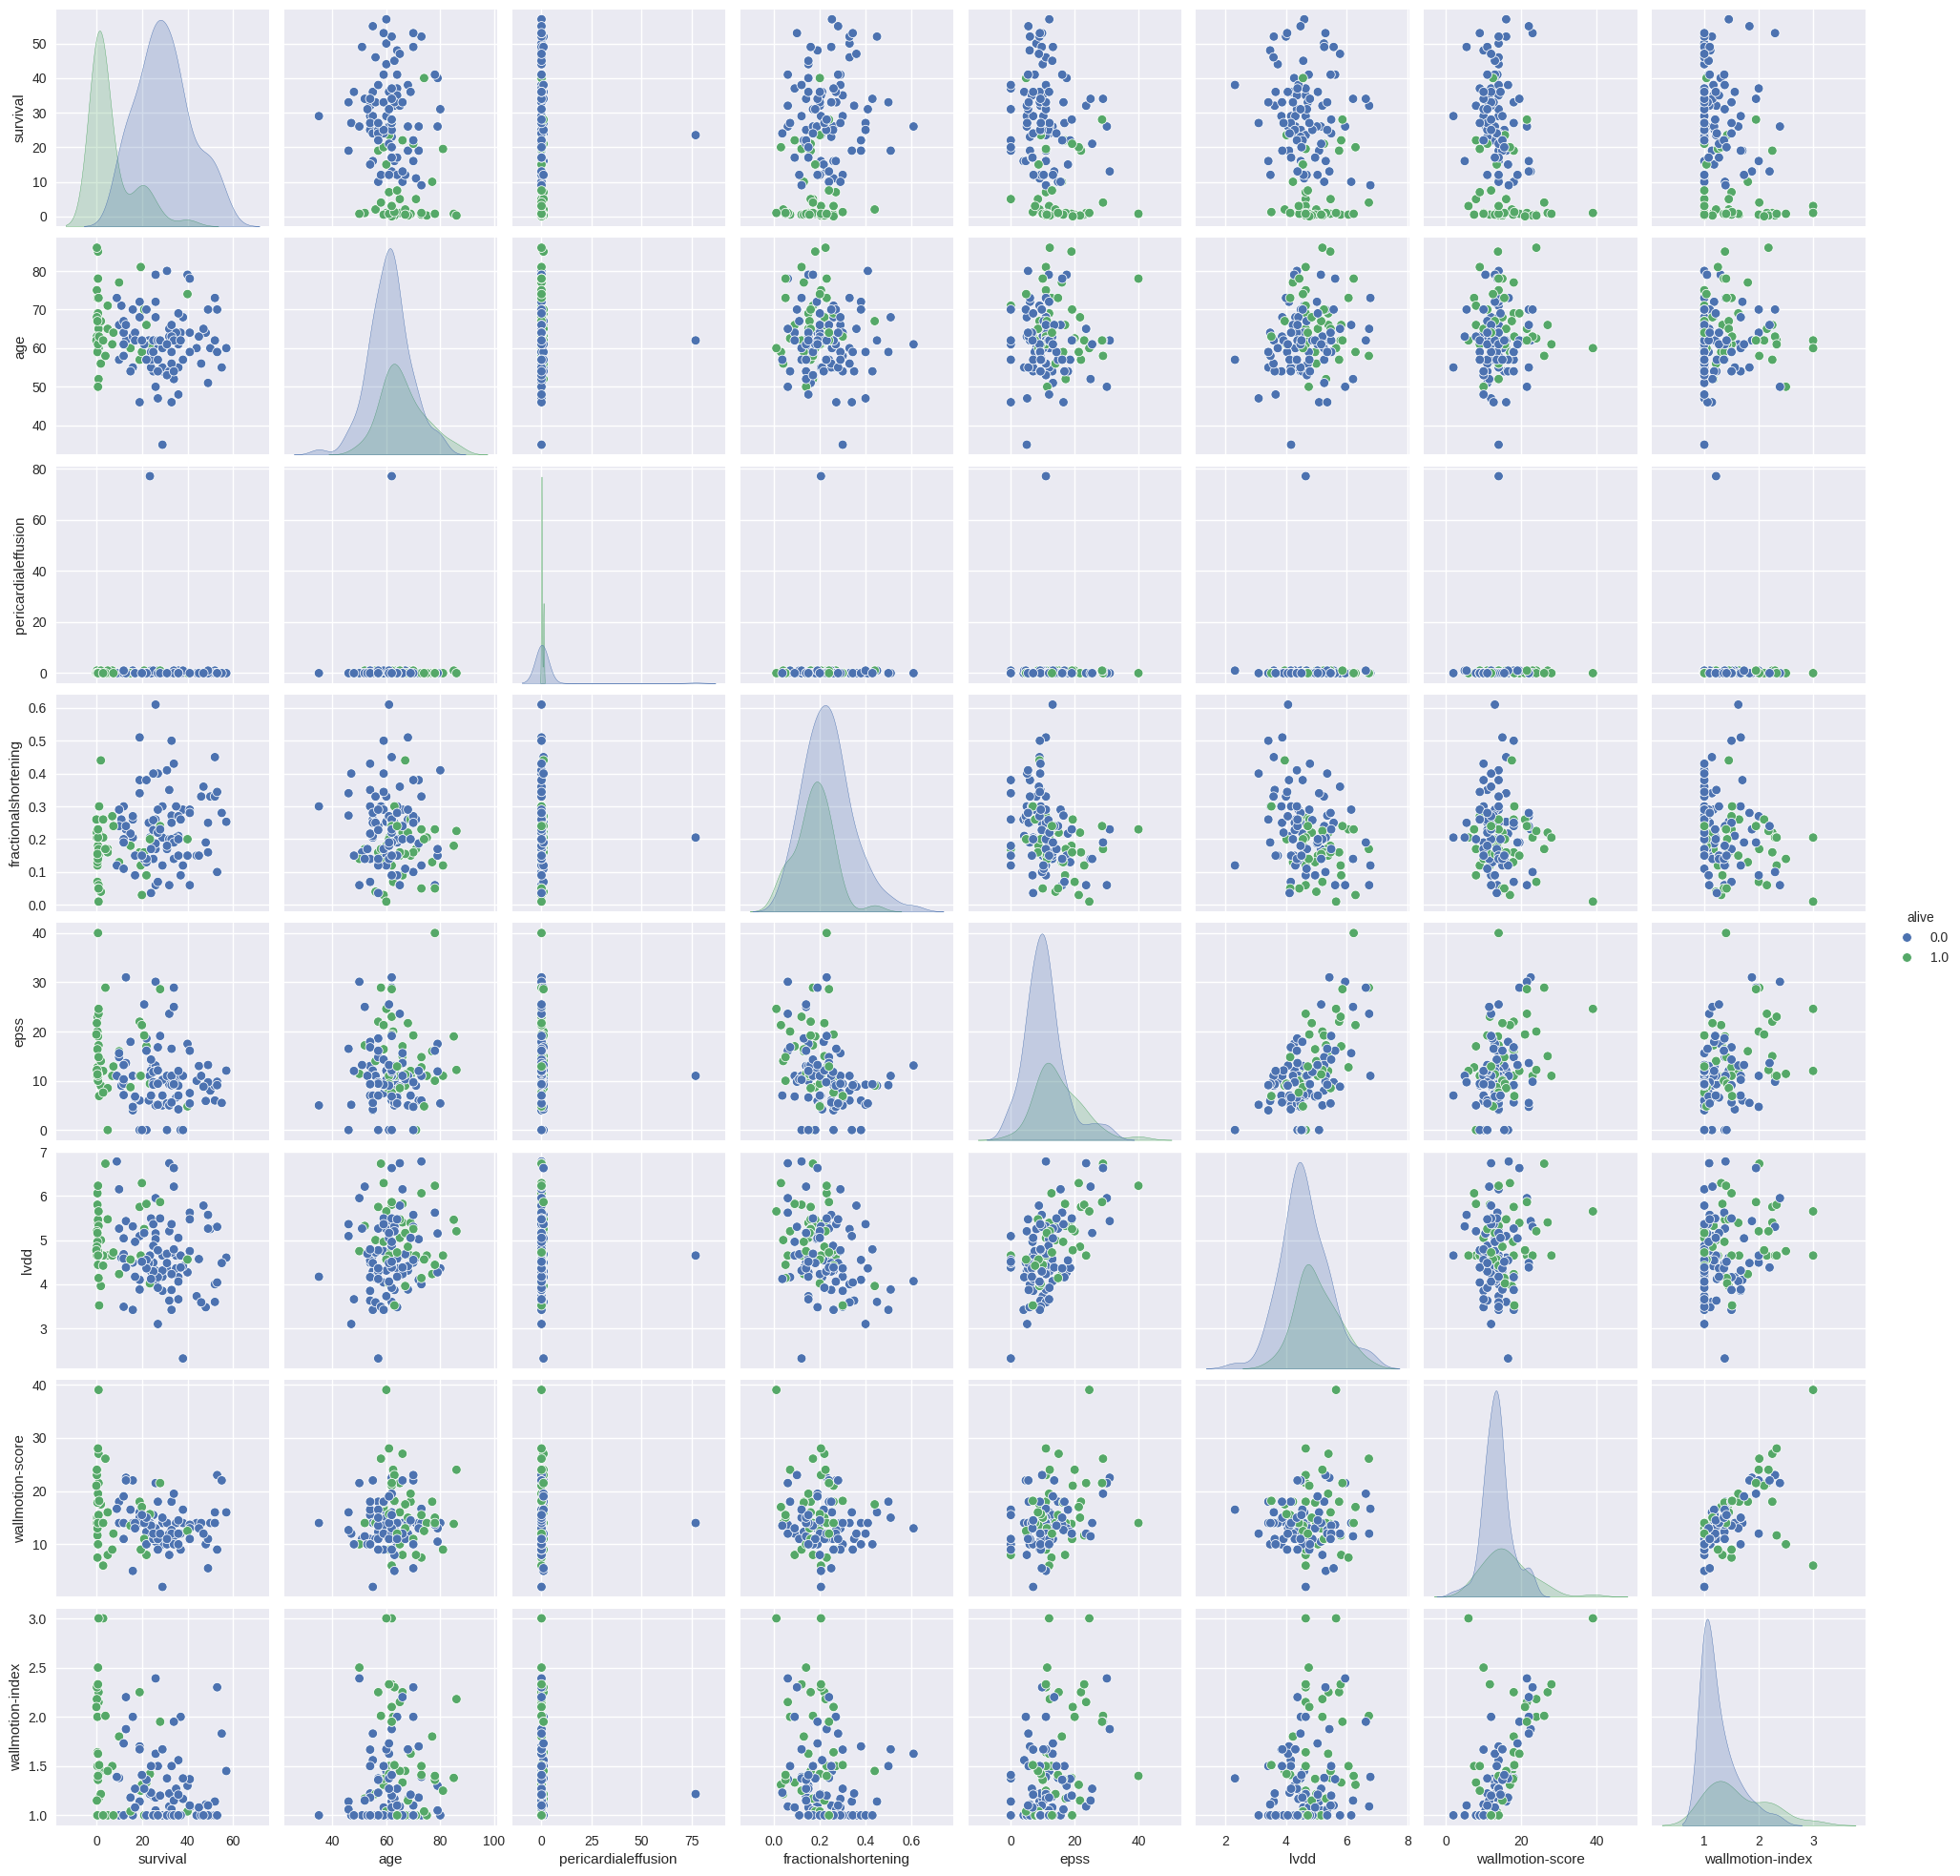

In [158]:
sns.pairplot(df,hue = "alive")


Look at correlations to make nothing is too highly correlated

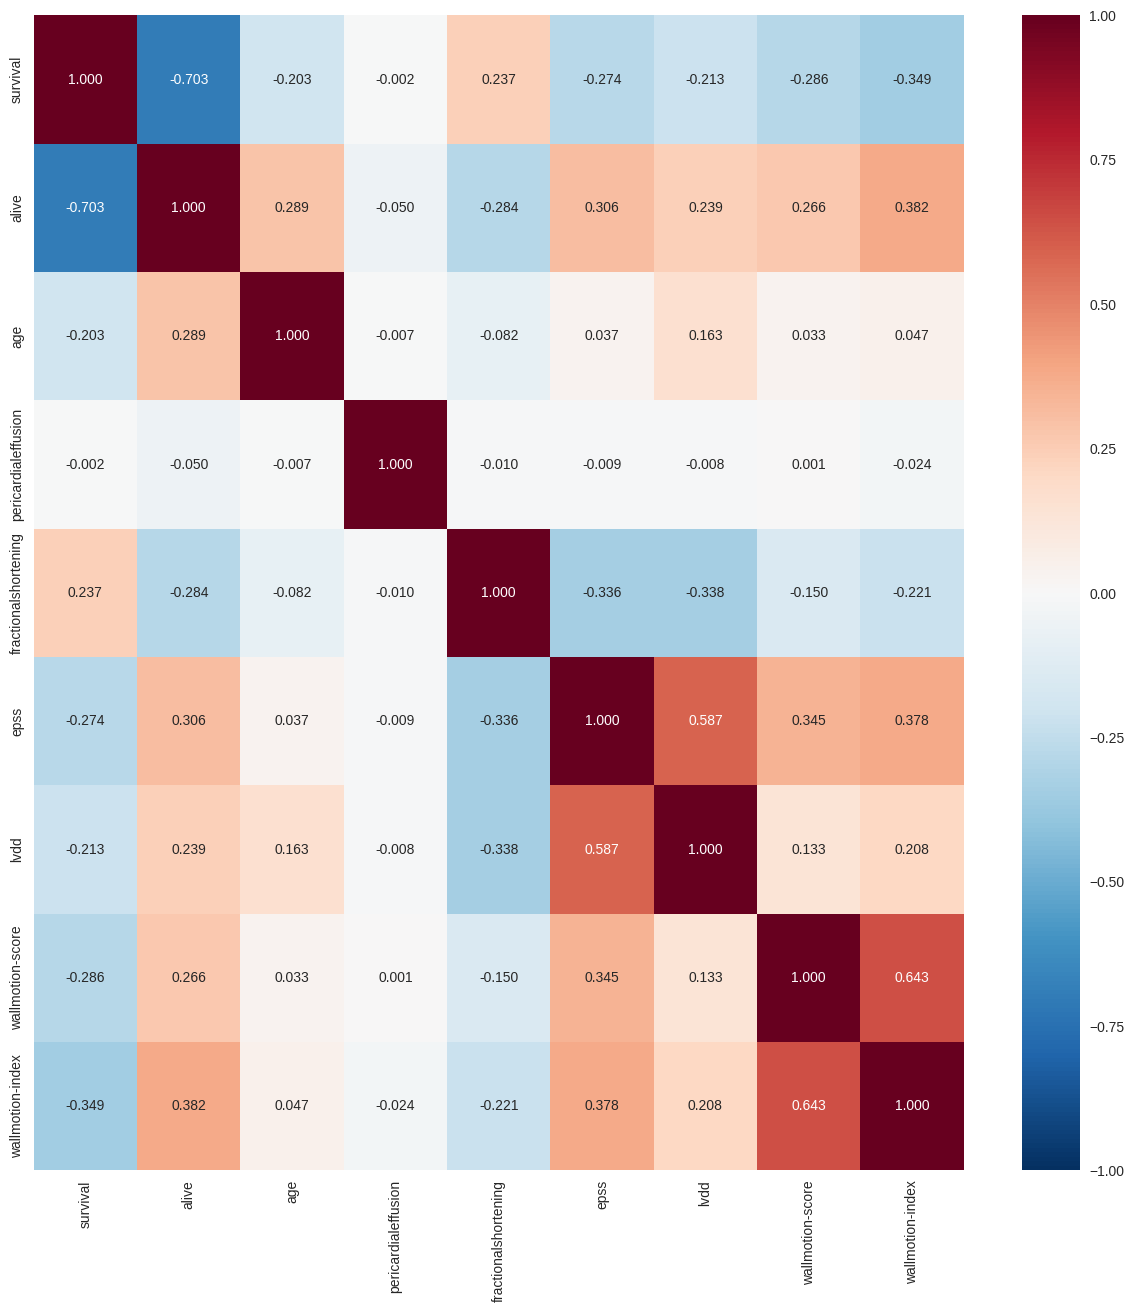

In [173]:
plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(),annot = True, fmt = ".3f",cmap = "RdBu_r", vmin=-1, vmax=1)
plt.show()





Note the high corrleations that may cause issues with the modelling

#ML Modeling



## Data Preparation

In [135]:


# start by initializing a dictionary for all of our ROC scores:

model_auc_scores = {}


In [136]:
#Loading Libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [137]:
#Feature Variables and Target Variables
X = df[["survival","age","pericardialeffusion","fractionalshortening","epss","lvdd","wallmotion-score","wallmotion-index"]]
y = df["alive"]

In [138]:
#Split Data into Testing and Training Data
# original random_state = 42 gives results *81, 78, 85)
random_state_value = 99
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = random_state_value)

## Logistic Regression

In [161]:

lrmodel = LogisticRegression(solver="liblinear")
lrmodel.fit(X_train,y_train)

y_pred_lr = lrmodel.predict(X_test)

Text(0.5, 31.222222222222214, 'Predicted Label')

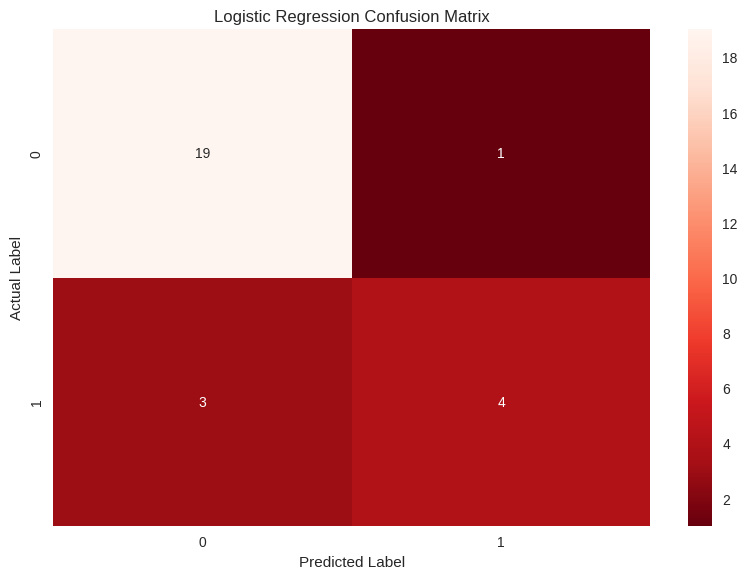

In [140]:
# Confusion Matrix for default classificaiton  (prob > 0.5)

cnf_matrix_lr = metrics.confusion_matrix(y_test,y_pred_lr)
sns.heatmap(pd.DataFrame(cnf_matrix_lr),annot = True,cmap = "Reds_r")
plt.tight_layout()
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [162]:
## Print metrics

print("Predictive Model Accuracy Score:",metrics.accuracy_score(y_test,y_pred_lr).round(3))
print("Predictive Precision Score",metrics.precision_score(y_test,y_pred_lr).round(3))
print("Predictive Recall Score",metrics.recall_score(y_test,y_pred_lr).round(3))
print("Predictive F1 Score",metrics.f1_score(y_test,y_pred_lr).round(3))

# calculate AUC score and store in our dictionary

fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_lr)
print("AUC Score",metrics.auc(fpr,tpr).round(4))

model_auc_scores['Logistic Regression'] = metrics.auc(fpr,tpr)


Predictive Model Accuracy Score: 0.852
Predictive Precision Score 0.8
Predictive Recall Score 0.571
Predictive F1 Score 0.667
AUC Score 0.7607


## Naive Bayes

In [142]:
#Loading Libraries
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB


In [144]:
gaussian = GaussianNB()
nb = gaussian.fit(X_train,y_train)
y_pred_NB = gaussian.predict(X_test)

accuracy_nb = metrics.accuracy_score(y_test,y_pred_NB)
print(f"Naive Bayes Accuracy :{accuracy_nb}")

Naive Bayes Accuracy :0.8148148148148148


In [145]:

print("Predictive Model Accuracy Score:",metrics.accuracy_score(y_test,y_pred_NB))
print("Predictive Precision Score",metrics.precision_score(y_test,y_pred_NB))
print("Predictive Recall Score",metrics.recall_score(y_test,y_pred_NB))
print("Predictive F1 Score",metrics.f1_score(y_test,y_pred_NB))

# add the NB score to the f1 list created earlier
f1_scores.append(metrics.f1_score(y_test,y_pred_NB))


#print ROC score
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_NB)
print("Predictive ROC Score",metrics.auc(fpr,tpr))

model_auc_scores['Naive Bayes'] = metrics.auc(fpr,tpr)


Predictive Model Accuracy Score: 0.8148148148148148
Predictive Precision Score 0.625
Predictive Recall Score 0.7142857142857143
Predictive F1 Score 0.6666666666666666
Predictive ROC Score 0.7821428571428573


Text(0.5, 31.222222222222214, 'Predicted Label')

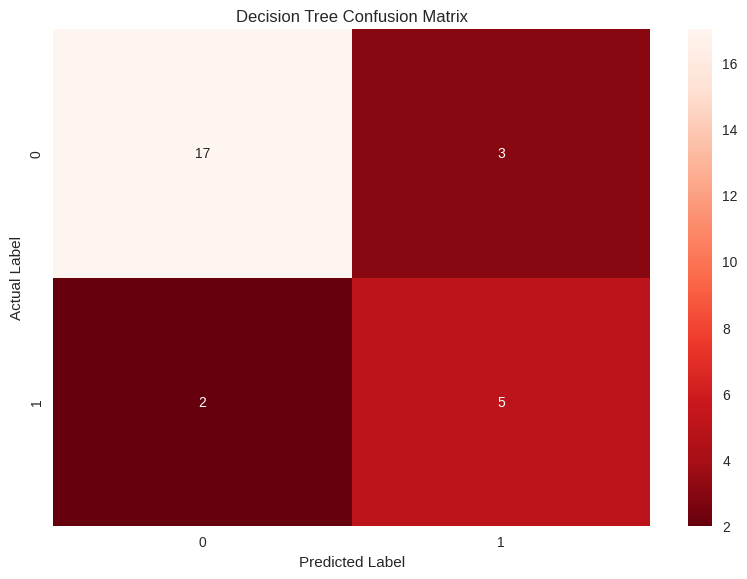

In [146]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf_matrix_NB =confusion_matrix(y_test,y_pred_NB)
sns.heatmap(pd.DataFrame(cnf_matrix_NB),annot = True,cmap = "Reds_r")
plt.tight_layout()
plt.title("Decision Tree Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

## Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_prob_rf)
model_auc_scores['Random Forest'] = auc_rf

## Neural Networks (using Keras)

In [147]:
#Loading Libraries

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [148]:
#Defining Keras Model
kmodel = Sequential()
kmodel.add(Dense(12,input_shape =(8,), activation = "relu"))
kmodel.add(Dense(8,activation = "relu"))
kmodel.add(Dense(1,activation = "sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
#Compile Keras Model
kmodel.compile(loss = "binary_crossentropy", optimizer = "adam", metrics =['accuracy'])


In [150]:
#Fitting Keras Model
kmodel.fit(X,y,epochs = 100, batch_size = len(X_train))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6681 - loss: 3.3118
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6807 - loss: 3.0974 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6807 - loss: 2.9956 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6681 - loss: 2.9745 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6744 - loss: 2.7749 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6838 - loss: 2.5717 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6807 - loss: 2.5077 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6650 - loss: 2.5027 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6744 - loss: 2.3210 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6713 - loss: 2.2051 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6650 - loss: 2.1524 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6838 - loss

In [151]:
#Evaluating Keras Model
_, keras_accuracy = kmodel.evaluate(X,y)
print(f"Keras Predicted Model Accuracy:{keras_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8682 - loss: 0.2789  
Keras Predicted Model Accuracy:0.8872180581092834


In [152]:

# get f1 score from kmodel
loss, accuracy = kmodel.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the positive class (class 1)
y_prob = kmodel.predict(X_test)

# Calculate AUC
model_auc_scores['Keras'] = roc_auc_score(y_test, y_prob)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8519 - loss: 0.4117
Accuracy: 0.8518518805503845


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


# Results

In [155]:
print("random state =", random_state_value)

for model_name, auc_score in model_auc_scores.items():
    print(f"{model_name}: AUC = {auc_score:.4f}")


random state = 99
Logistic Regression: AUC = 0.7607
Naive Bayes: AUC = 0.7821
Keras: AUC = 0.8214
Random Forest: AUC = 0.8107


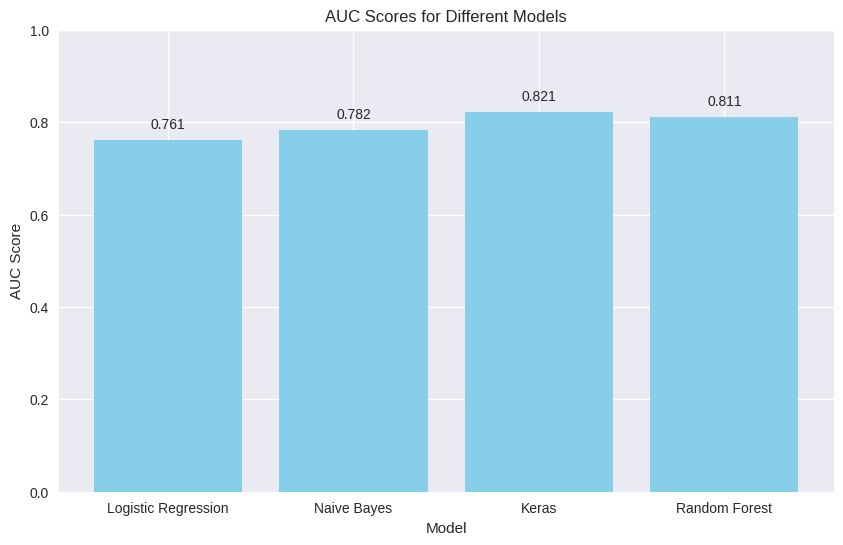

In [160]:
#  print the actual value of the AUC score (to three decimal places) above each bar in the barplot

import matplotlib.pyplot as plt
# Create barplot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_auc_scores.keys(), model_auc_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('AUC Scores for Different Models')
plt.ylim(0, 1)  # AUC ranges from 0 to 1

# Add AUC values as text above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom')

plt.show()
